In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [19]:
colnames = ['X','Y']
lsf = pd.read_csv('10avg_ramlak.csv', names=colnames, header=None)
lsf.head()
lsf['derivative'] = np.gradient(lsf['Y'], lsf['X'])  # Use np.gradient for efficient calculation

# lsf.plot(x='X', y='Y', xlabel="dr", ylabel="dI", kind='line')


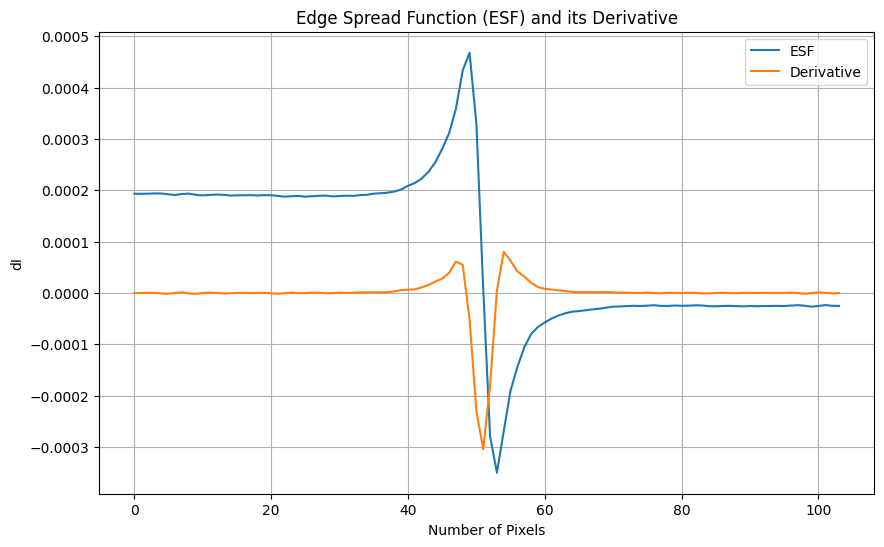

In [20]:
# Plot the LSF and its derivative
plt.figure(figsize=(10, 6))
plt.plot(lsf['X'], lsf['Y'], label='ESF')
plt.plot(lsf['X'], lsf['derivative'], label='Derivative')
plt.title("Edge Spread Function (ESF) and its Derivative")
plt.xlabel("Number of Pixels")
plt.ylabel("dI")
plt.grid(True)
plt.legend()
plt.show()

# Extract the derivative values
lsf_derivative_values = lsf['derivative'].values

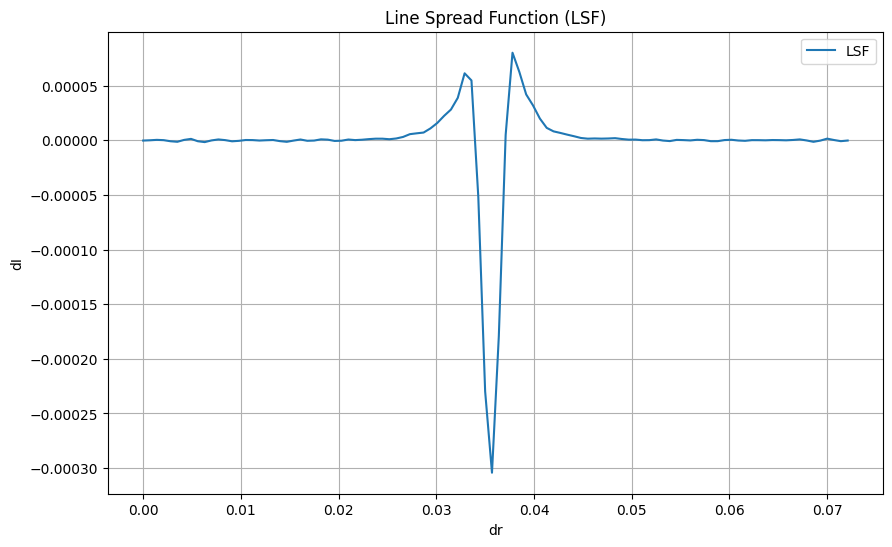

In [21]:
plt.figure(figsize=(10, 6))
# scale x axis by pixel size? maybe should be 0.0007?
lsf['X'] = lsf['X'].multiply(0.0007)
plt.plot(lsf['X'], lsf['derivative'], label='LSF')
plt.title("Line Spread Function (LSF)")
plt.xlabel("dr")
plt.ylabel("dI")
plt.grid(True)
plt.legend()
plt.show()


Take 1-d discrete fourier transform of the lsf
https://docs.scipy.org/doc/scipy/tutorial/fft.html 

(-0.01, 0.7)

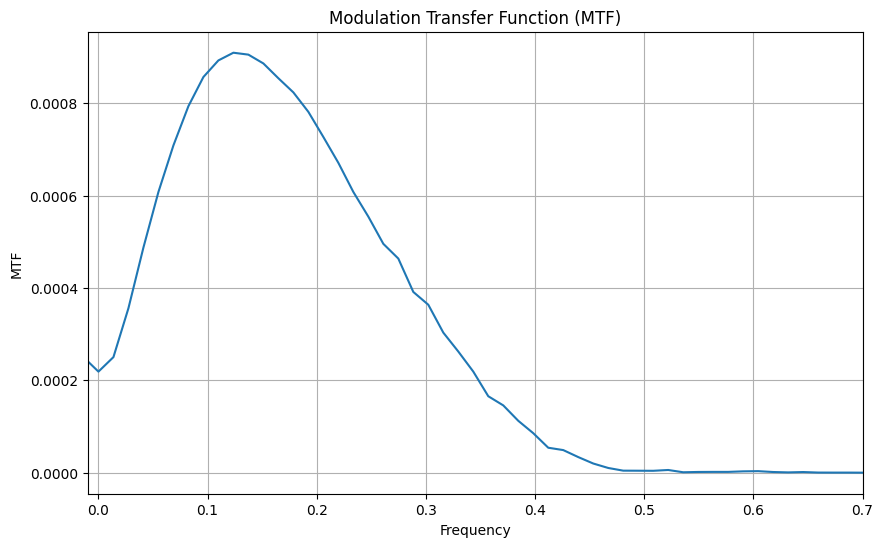

In [22]:
# Convert the LSF values from pandas series to numpy array to avoid compatibility issues
#lsf_values_np = lsf_values.to_numpy()
lsf_values_np = lsf_derivative_values 
# Perform Fourier Transform on the LSF values to obtain the MTF
mtf = np.abs(fft(lsf_values_np))

# Generate frequency axis for MTF plot
# frequencies = np.fft.fftfreq(len(lsf_values_np), d=(0.7))
frequencies = np.fft.fftfreq(len(lsf_values_np), d=(0.7))

# Sort the frequencies and corresponding MTF values for proper plotting
sorted_indices = np.argsort(frequencies)
sorted_frequencies = frequencies[sorted_indices]
sorted_mtf = mtf[sorted_indices]

# Preparing the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_frequencies, sorted_mtf)
plt.title("Modulation Transfer Function (MTF)")
plt.xlabel("Frequency")
plt.ylabel("MTF")
plt.grid(True)

# Since MTF is usually plotted for positive frequencies only
plt.xlim(-0.01, 0.7)
